### Pinch Hitters in IPL So far

In [1]:
import math 
import pandas as pd 
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', None)
pd.set_option('max_colwidth', 1)

import matplotlib.pyplot as plt

In [2]:
matches = pd.read_csv('R:\Cricket Analytics\ipl_data\IPL.csv')

In [3]:
matches.head(2)

,Unnamed: 0,match_id,date,match_type,event_name,innings,batting_team,bowling_team,over,ball,ball_no,batter,bat_pos,runs_batter,balls_faced,bowler,valid_ball,runs_extras,runs_total,runs_bowler,runs_not_boundary,extra_type,non_striker,non_striker_pos,wicket_kind,player_out,fielders,runs_target,review_batter,team_reviewed,review_decision,umpire,umpires_call,player_of_match,match_won_by,win_outcome,toss_winner,toss_decision,venue,city,day,month,year,season,gender,team_type,superover_winner,result_type,method,balls_per_over,overs,event_match_no,stage,match_number,team_runs,team_balls,team_wicket,new_batter,batter_runs,batter_balls,bowler_wicket,batting_partners,next_batter,striker_out
0,131970,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,0.1,SC Ganguly,1,0,1,P Kumar,1,1,1,0,False,legbyes,BB McCullum,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,BB McCullum,Kolkata Knight Riders,140 runs,Royal Challengers Bangalore,field,M Chinnaswamy Stadium,Bangalore,18,4,2008,2007/08,male,club,NaN,NaN,NaN,6,20,1,Unknown,Unknown,1,1,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
1,131971,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,0.2,BB McCullum,2,0,1,P Kumar,1,0,0,0,False,NaN,SC Ganguly,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,BB McCullum,Kolkata Knight Riders,140 runs,Royal Challengers Bangalore,field,M Chinnaswamy Stadium,Bangalore,18,4,2008,2007/08,male,club,NaN,NaN,NaN,6,20,1,Unknown,Unknown,1,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False


In [4]:
matches.columns

Index(['Unnamed: 0', 'match_id', 'date', 'match_type', 'event_name', 'innings',
       'batting_team', 'bowling_team', 'over', 'ball', 'ball_no', 'batter',
       'bat_pos', 'runs_batter', 'balls_faced', 'bowler', 'valid_ball',
       'runs_extras', 'runs_total', 'runs_bowler', 'runs_not_boundary',
       'extra_type', 'non_striker', 'non_striker_pos', 'wicket_kind',
       'player_out', 'fielders', 'runs_target', 'review_batter',
       'team_reviewed', 'review_decision', 'umpire', 'umpires_call',
       'player_of_match', 'match_won_by', 'win_outcome', 'toss_winner',
       'toss_decision', 'venue', 'city', 'day', 'month', 'year', 'season',
       'gender', 'team_type', 'superover_winner', 'result_type', 'method',
       'balls_per_over', 'overs', 'event_match_no', 'stage', 'match_number',
       'team_runs', 'team_balls', 'team_wicket', 'new_batter', 'batter_runs',
       'batter_balls', 'bowler_wicket', 'batting_partners', 'next_batter',
       'striker_out'],
      dtype='object')

In [5]:
import pandas as pd
import numpy as np

def balls_per_dismissal(balls, dismissals):
    if dismissals > 0:
        return balls/dismissals
    else:
        return balls/1
        
def balls_per_boundary(balls, boundaries):
    if boundaries > 0:
        return balls/boundaries
    else:
        return balls/1

def playerStatistics(df):

    df['isDot'] = df['runs_batter'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['runs_batter'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['runs_batter'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['runs_batter'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['runs_batter'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['runs_batter'].apply(lambda x: 1 if x == 6 else 0)
    
    runs = pd.DataFrame(df.groupby(['batter'])['runs_batter'].sum()).reset_index().rename(columns={'runs_batter': 'runs'})
    balls = pd.DataFrame(df.groupby(['batter'])['match_id'].count()).reset_index().rename(columns={'match_id': 'balls_faced'})
    innings = pd.DataFrame(df.groupby(['batter'])['match_id'].apply(lambda x: len(list(np.unique(x))))).reset_index().rename(columns={'match_id': 'innings'})
    dismissals = pd.DataFrame(df.groupby(['batter'])['player_out'].count()).reset_index().rename(columns={'player_out': 'dismissals'})
    
    dots = pd.DataFrame(df.groupby(['batter'])['isDot'].sum()).reset_index().rename(columns={'isDot': 'dots'})
    ones = pd.DataFrame(df.groupby(['batter'])['isOne'].sum()).reset_index().rename(columns={'isOne': 'ones'})
    twos = pd.DataFrame(df.groupby(['batter'])['isTwo'].sum()).reset_index().rename(columns={'isTwo': 'twos'})
    threes = pd.DataFrame(df.groupby(['batter'])['isThree'].sum()).reset_index().rename(columns={'isThree': 'threes'})
    fours = pd.DataFrame(df.groupby(['batter'])['isFour'].sum()).reset_index().rename(columns={'isFour': 'fours'})
    sixes = pd.DataFrame(df.groupby(['batter'])['isSix'].sum()).reset_index().rename(columns={'isSix': 'sixes'})

    df = pd.merge(innings, runs, on='batter').merge(balls, on='batter').merge(dismissals, on='batter').merge(dots, on='batter').merge(ones, on='batter').merge(twos, on='batter').merge(threes, on='batter').merge(fours, on='batter').merge(sixes, on='batter')
    
    df['SR'] = df.apply(lambda x: 100 * (x['runs'] / x['balls_faced']), axis=1)
    df['RPI'] = df.apply(lambda x: x['runs'] / x['innings'], axis=1)
    df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls_faced'], x['dismissals']), axis=1)
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls_faced'], (x['fours'] + x['sixes'])), axis=1)

    return df

In [6]:
df = playerStatistics(matches)

In [7]:
df.head()

,batter,innings,runs,balls_faced,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,23,280,196,15,61,83,20,1,16,15,142.857143,12.173913,13.066667,6.322581
1,A Badoni,46,963,740,36,261,297,67,4,73,38,130.135135,20.934783,20.555556,6.666667
2,A Chandila,2,4,7,1,3,4,0,0,0,0,57.142857,2.000000,7.000000,7.000000
3,A Chopra,6,53,75,5,45,21,2,0,7,0,70.666667,8.833333,15.000000,10.714286
4,A Choudhary,3,25,20,2,4,13,1,0,1,1,125.000000,8.333333,10.000000,10.000000


### Performance in different phases of play

In [8]:
def phase (over):
    if over <= 6:
        return 'Powerplay'
    elif over <= 15:
        return 'Middle'
    else:
        return 'Death'

In [9]:
matches['phase'] = matches['over'].apply(lambda x: phase(x))

In [10]:
def phasesOfplay(df, current_phase):

    df = df[df.phase == current_phase]
    df.reset_index(inplace = True, drop = True)
  
    df['isDot'] = df['runs_batter'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['runs_batter'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['runs_batter'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['runs_batter'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['runs_batter'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['runs_batter'].apply(lambda x: 1 if x == 6 else 0)
    
    runs = pd.DataFrame(df.groupby(['batter'])['runs_batter'].sum()).reset_index().rename(columns={'runs_batter': 'runs'})
    balls = pd.DataFrame(df.groupby(['batter'])['match_id'].count()).reset_index().rename(columns={'match_id': 'balls_faced'})
    innings = pd.DataFrame(df.groupby(['batter'])['match_id'].apply(lambda x: len(list(np.unique(x))))).reset_index().rename(columns={'match_id': 'innings'})
    dismissals = pd.DataFrame(df.groupby(['batter'])['player_out'].count()).reset_index().rename(columns={'player_out': 'dismissals'})
    
    dots = pd.DataFrame(df.groupby(['batter'])['isDot'].sum()).reset_index().rename(columns={'isDot': 'dots'})
    ones = pd.DataFrame(df.groupby(['batter'])['isOne'].sum()).reset_index().rename(columns={'isOne': 'ones'})
    twos = pd.DataFrame(df.groupby(['batter'])['isTwo'].sum()).reset_index().rename(columns={'isTwo': 'twos'})
    threes = pd.DataFrame(df.groupby(['batter'])['isThree'].sum()).reset_index().rename(columns={'isThree': 'threes'})
    fours = pd.DataFrame(df.groupby(['batter'])['isFour'].sum()).reset_index().rename(columns={'isFour': 'fours'})
    sixes = pd.DataFrame(df.groupby(['batter'])['isSix'].sum()).reset_index().rename(columns={'isSix': 'sixes'})

    df = pd.merge(innings, runs, on='batter').merge(balls, on='batter').merge(dismissals, on='batter').merge(dots, on='batter').merge(ones, on='batter').merge(twos, on='batter').merge(threes, on='batter').merge(fours, on='batter').merge(sixes, on='batter')
    
    df['SR'] = df.apply(lambda x: 100 * (x['runs'] / x['balls_faced']), axis=1)
    df['RPI'] = df.apply(lambda x: x['runs'] / x['innings'], axis=1)
    df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls_faced'], x['dismissals']), axis=1)
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls_faced'], (x['fours'] + x['sixes'])), axis=1)

    return df

In [11]:
pp_df = phasesOfplay(matches, 'Powerplay')
mid_df = phasesOfplay(matches, 'Middle')
dth_df = phasesOfplay(matches, 'Death')

In [12]:
pp_df.head(3)

,batter,innings,runs,balls_faced,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,1,5,7,1,5,1,0,0,1,0,71.428571,5.0,7.0,7.00
1,A Badoni,10,44,63,3,35,22,2,0,3,1,69.841270,4.4,21.0,15.75
2,A Chopra,5,29,45,2,28,13,0,0,4,0,64.444444,5.8,22.5,11.25


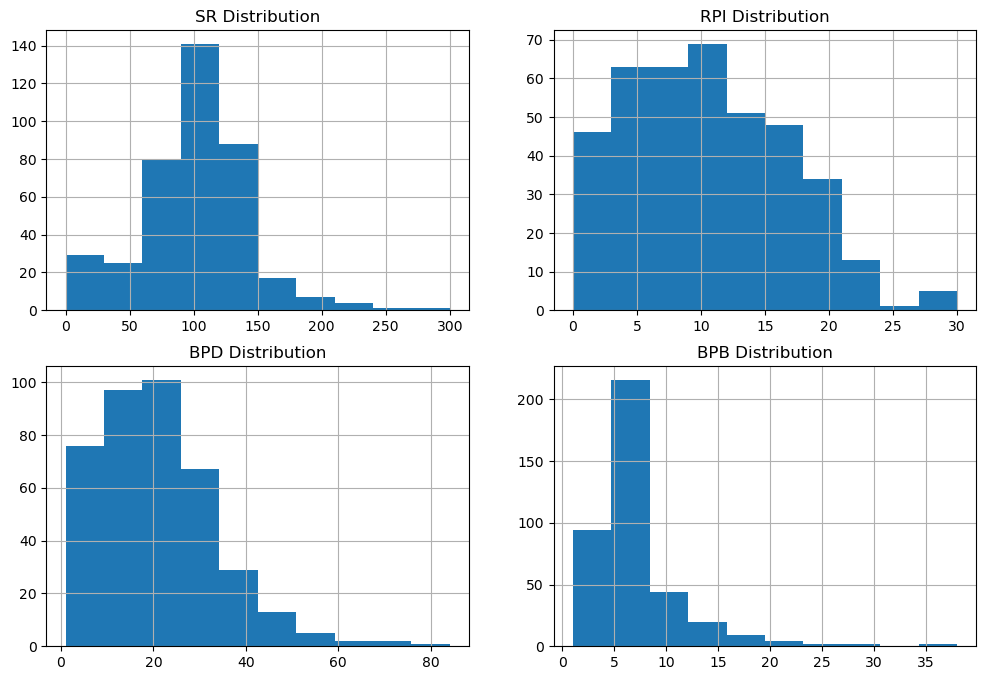

In [13]:
plt.figure(figsize = (12, 8))

plt.subplot(221)
pp_df.SR.hist()
plt.title('SR Distribution')

plt.subplot(222)
pp_df.RPI.hist()
plt.title('RPI Distribution')

plt.subplot(223)
pp_df.BPD.hist()
plt.title('BPD Distribution')

plt.subplot(224)
pp_df.BPB.hist()
plt.title('BPB Distribution')
plt.show()

In [14]:
import seaborn as sns

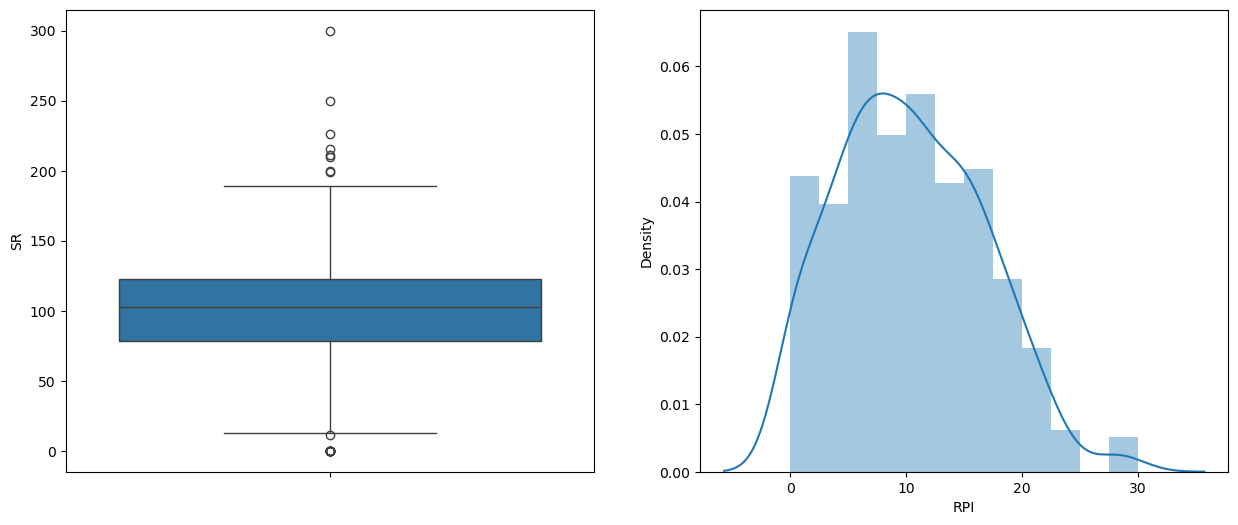

In [15]:
plt.figure(figsize = (15, 6))

plt.subplot(121)
sns.boxplot(pp_df['SR'])

plt.subplot(122)
sns.distplot(pp_df['RPI'])
plt.show()

In [16]:
np.percentile(pp_df['SR'], 25), np.percentile(pp_df['SR'], 50), np.percentile(pp_df['SR'], 75)

(np.float64(78.125),
 np.float64(102.56410256410255),
 np.float64(122.72727272727273))

In [17]:
wt_sr, wt_rpi, wt_bpd, wt_bpb = 0.38, 0.25, 0.12, 0.26

In [18]:
# filter by min 20 innings
pp_df = pp_df[pp_df.innings >= 20]
pp_df.reset_index(inplace = True, drop = True)

## Topsis Method:

### (alternatives: minmax scaling, standard scaling)
### Calculation - Normalizing all values to same dimensions

In [19]:
pp_df['calc_SR'] = pp_df['SR'].apply(lambda x: x*x)
pp_df['calc_RPI'] = pp_df['RPI'].apply(lambda x: x*x)
pp_df['calc_BPD'] = pp_df['BPD'].apply(lambda x: x*x)
pp_df['calc_BPB'] = pp_df['BPB'].apply(lambda x: x*x)

sq_sr, sq_rpi, sq_bpd, sq_bpb = np.sqrt(pp_df[['calc_SR', 'calc_RPI', 'calc_BPD', 'calc_BPB']].sum(axis=0))

pp_df['calc_SR'] = pp_df['calc_SR'].apply(lambda x: x / sq_sr)
pp_df['calc_RPI'] = pp_df['calc_RPI'].apply(lambda x: x / sq_rpi)
pp_df['calc_BPD'] = pp_df['calc_BPD'].apply(lambda x: x / sq_bpd)
pp_df['calc_BPB'] = pp_df['calc_BPB'].apply(lambda x: x / sq_bpb)

pp_df['calc_SR'] = pp_df['calc_SR'].apply(lambda x: x * wt_sr)
pp_df['calc_RPI'] = pp_df['calc_RPI'].apply(lambda x: x * wt_rpi)
pp_df['calc_BPD'] = pp_df['calc_BPD'].apply(lambda x: x * wt_bpd)
pp_df['calc_BPB'] = pp_df['calc_BPB'].apply(lambda x: x * wt_bpb)

best_sr, worst_sr = max(pp_df['calc_SR']), min(pp_df['calc_SR'])
best_rpi, worst_rpi = max(pp_df['calc_RPI']), min(pp_df['calc_RPI'])
best_bpd, worst_bpd = max(pp_df['calc_BPD']), min(pp_df['calc_BPD'])
best_bpb, worst_bpb = min(pp_df['calc_BPB']), max(pp_df['calc_BPB'])

### Calculation - Comparision against the best & worst values

In [20]:
pp_df['dev_best_SR'] = pp_df['calc_SR'].apply(lambda x: (x - best_sr) * (x - best_sr))
pp_df['dev_best_RPI'] = pp_df['calc_RPI'].apply(lambda x: (x - best_rpi) * (x - best_rpi))
pp_df['dev_best_BPD'] = pp_df['calc_BPD'].apply(lambda x: (x - best_bpd) * (x - best_bpd))
pp_df['dev_best_BPB'] = pp_df['calc_BPB'].apply(lambda x: (x - best_bpb) * (x - best_bpb))

pp_df['dev_best_sqrt'] = pp_df.apply(lambda x: x['dev_best_SR'] + x['dev_best_RPI'] + x['dev_best_BPD'] + x['dev_best_BPB'], axis=1)

pp_df['dev_worst_SR'] = pp_df['calc_SR'].apply(lambda x: (x - worst_sr) * (x - worst_sr))
pp_df['dev_worst_RPI'] = pp_df['calc_RPI'].apply(lambda x: (x - worst_rpi) * (x - worst_rpi))
pp_df['dev_worst_BPD'] = pp_df['calc_BPD'].apply(lambda x: (x - worst_bpd) * (x - worst_bpd))
pp_df['dev_worst_BPB'] = pp_df['calc_BPB'].apply(lambda x: (x - worst_bpb) * (x - worst_bpb))

pp_df['dev_worst_sqrt'] = pp_df.apply(lambda x: x['dev_worst_SR'] + x['dev_worst_RPI'] + x['dev_worst_BPD'] + x['dev_worst_BPB'], axis=1)

### Final Step - Overall score for each player (values from 0 - 1)

In [21]:
pp_df['score'] = pp_df.apply(lambda x: x['dev_worst_sqrt']/(x['dev_worst_sqrt'] + x['dev_best_sqrt']), axis = 1)

In [22]:
pp_df[['batter', 'score']].head()

,batter,score
0,AB de Villiers,0.172488
1,AC Gilchrist,0.330280
2,AJ Finch,0.121856
3,AK Markram,0.275231
4,AM Rahane,0.187131


### End Result : Top players for our required role

In [23]:
pp_df[['batter', 'innings', 'runs', 'balls_faced', 'dismissals', 'fours', 'sixes', 'SR', 'BPB', 'score']].sort_values(['score'], ascending=False)

,batter,innings,runs,balls_faced,dismissals,fours,sixes,SR,BPB,score
98,TM Head,32,751,432,17,98,36,173.842593,3.223881,0.919208
68,PD Salt,32,776,468,22,95,40,165.811966,3.466667,0.883949
87,SP Narine,70,1212,763,55,143,75,158.846658,3.500000,0.816365
62,N Pooran,20,264,166,11,21,22,159.036145,3.860465,0.814649
7,Abhishek Sharma,53,1145,731,32,127,60,156.634747,3.909091,0.807835
105,YBK Jaiswal,66,1503,995,36,207,61,151.055276,3.712687,0.746365
58,MR Marsh,34,613,416,14,55,39,147.355769,4.425532,0.687903
65,P Simran Singh,49,941,657,34,112,42,143.226788,4.266234,0.605719
13,CA Lynn,40,875,623,19,103,45,140.449438,4.209459,0.580473
36,JM Bairstow,49,1015,721,26,125,40,140.776699,4.369697,0.575969
